<a href="https://colab.research.google.com/github/rvishakhs/Deep_Learning/blob/Fundamentals/CNN_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to computer Vision



In [2]:
# Get the data

import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file

zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2025-01-17 19:27:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.207, 74.125.135.207, 74.125.142.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   103MB/s    in 1.0s    

2025-01-17 19:27:09 (103 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

In [3]:
import os
# Walkthrough pizza_steak directory and list the number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [4]:
!ls -la pizza_steak


total 16
drwxr-xr-x 4 root root 4096 Jan 17 19:27 .
drwxr-xr-x 1 root root 4096 Jan 17 19:27 ..
drwxr-xr-x 4 root root 4096 Jan 17 19:27 test
drwxr-xr-x 4 root root 4096 Jan 17 19:27 train


In [5]:
# Get the class names programmatically

import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
#class_names = class_names[1:]
print(class_names)

['pizza' 'steak']


In [6]:
#Let's Visualize our images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def View_random_images(target_dir, target_class):
  # Setup the target directory (we'll view images from there)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read and Display the image
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img

Image shape: (512, 512, 3)


array([[[152, 133, 118],
        [152, 133, 118],
        [152, 133, 118],
        ...,
        [163, 141, 130],
        [163, 141, 130],
        [163, 141, 130]],

       [[155, 136, 121],
        [155, 136, 121],
        [155, 136, 121],
        ...,
        [164, 142, 131],
        [163, 141, 130],
        [163, 141, 130]],

       [[157, 135, 121],
        [157, 135, 121],
        [157, 135, 121],
        ...,
        [164, 142, 131],
        [164, 142, 131],
        [164, 142, 131]],

       ...,

       [[219, 200, 194],
        [219, 200, 194],
        [218, 201, 194],
        ...,
        [211, 194, 186],
        [211, 194, 186],
        [211, 194, 186]],

       [[218, 199, 193],
        [218, 199, 193],
        [217, 200, 193],
        ...,
        [211, 194, 186],
        [211, 194, 186],
        [211, 194, 186]],

       [[217, 198, 192],
        [217, 198, 192],
        [217, 200, 193],
        ...,
        [210, 193, 185],
        [210, 193, 185],
        [210, 193, 185]]], dtype=uint8)
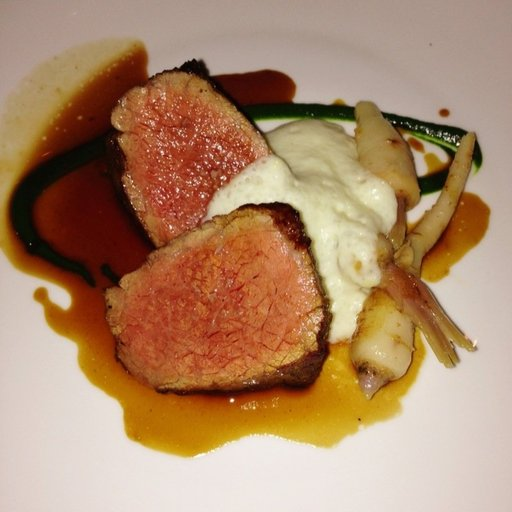

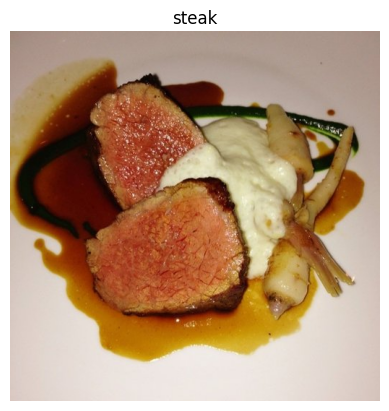

In [7]:
View_random_images(target_dir='pizza_steak/train/', target_class='steak')

### Build A CNN Network
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit our data into CNN



In [8]:
# Import libraries

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random seed
tf.random.set_seed(42)

# Preprocess data (Get all of the pixel values between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = 'pizza_steak/train' # Updated path
test_dir = 'pizza_steak/test'  # Updated path


# Import data from the directrories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               seed=42,
                                               class_mode='binary')

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               seed=42,
                                               class_mode='binary')

# Build the CNN Model
Model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
Model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_1 = Model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 286ms/step - accuracy: 0.6521 - loss: 0.6178 - val_accuracy: 0.8200 - val_loss: 0.3898
Epoch 2/5


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - accuracy: 0.8074 - loss: 0.4437 - val_accuracy: 0.8520 - val_loss: 0.3483
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.8385 - loss: 0.3873 - val_accuracy: 0.8620 - val_loss: 0.3386


# Let's break our Model


Image shape: (384, 512, 3)
Image shape: (384, 512, 3)


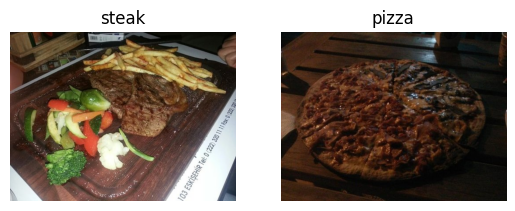

In [11]:
# Visualize our data
plt.figure()
plt.subplot(1,2,1)
steak_img = View_random_images('pizza_steak/train/', 'steak')
plt.subplot(1,2,2)
pizza_img = View_random_images('pizza_steak/train/', 'pizza')

In [12]:
# Preprocessing the data
train_data = 'pizza_steak/train'
test_data = 'pizza_steak/test'


In [13]:
!nvidia-smi

Fri Jan 17 19:34:18 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0              30W /  70W |   1703MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Our next step is to turn our data into **batches**

A batch is a small subset of data. Rather than look at all millions of images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images or more might not fit into the memory of your processor
2. Trying to learn the patterns in 10,000 images in one hit could result our model can't have a good learning curve



In [14]:
# Create train and test data genarators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Setup paths to our data directories
train_dir = 'pizza_steak/train' # Updated path
test_dir = 'pizza_steak/test'  # Updated path

In [16]:
# Load in our data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Directory we need to load our data
                                               target_size=(224,224), # Output data dimensions converts all data into this dimentions
                                               batch_size=32, # This is the number of batchs needed(32 in most of the cases)
                                               class_mode='binary', # Binary because we dealing with binary classification
                                               seed=42) # Custom seed size

test_data = test_datagen.flow_from_directory(directory=test_dir, # Directory we need to load our data
                                               target_size=(224,224), # Output data dimensions converts all data into this dimentions
                                               batch_size=32, # This is the number of batchs needed(32 in most of the cases)
                                               class_mode='binary', # Binary because we dealing with binary classification
                                               seed=42) # Custom seed size

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
